## Large Random Matrices

In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Setting styles
plt.style.use("bmh")
np.set_printoptions(precision= 4, suppress= True) # No scientific notation

**Let’s define a large random symmetric square matrix of size $N$, whose entries are either -1 or +1, and then divide it by $\sqrt{N}$:**

In [2]:
# Size of the matrix
N = 5000

In [3]:
# Creating the desired matrix
A = np.random.choice([- 1, 1], size = [N, N])
A = np.triu(A)
A = A + A.T - np.diag(A.diagonal())
A

array([[ 1,  1, -1, ...,  1,  1,  1],
       [ 1,  1,  1, ..., -1, -1, -1],
       [-1,  1, -1, ...,  1, -1, -1],
       ...,
       [ 1, -1,  1, ..., -1, -1, -1],
       [ 1, -1, -1, ..., -1,  1, -1],
       [ 1, -1, -1, ..., -1, -1,  1]])

In [4]:
A = A / np.sqrt(N)

**Let’s compute its eigenvalues, which are all real numbers, using NumPy tools. We will also plot the related histogram:**

In [5]:
# Computing the eigenvalues
eigenvalues = np.linalg.eigvalsh(A)
eigenvalues

array([-1.9918, -1.9885, -1.9831, ...,  1.978 ,  1.9812,  1.9867])

(array([0.0951, 0.1615, 0.2013, 0.2322, 0.2588, 0.2754, 0.2909, 0.3019,
        0.3108, 0.3174, 0.3163, 0.3163, 0.3152, 0.3108, 0.3008, 0.292 ,
        0.2754, 0.2577, 0.2334, 0.2057, 0.1615, 0.0995]),
 array([-1.9918, -1.811 , -1.6301, -1.4493, -1.2685, -1.0876, -0.9068,
        -0.7259, -0.5451, -0.3642, -0.1834, -0.0026,  0.1783,  0.3591,
         0.54  ,  0.7208,  0.9016,  1.0825,  1.2633,  1.4442,  1.625 ,
         1.8059,  1.9867]),
 <BarContainer object of 22 artists>)

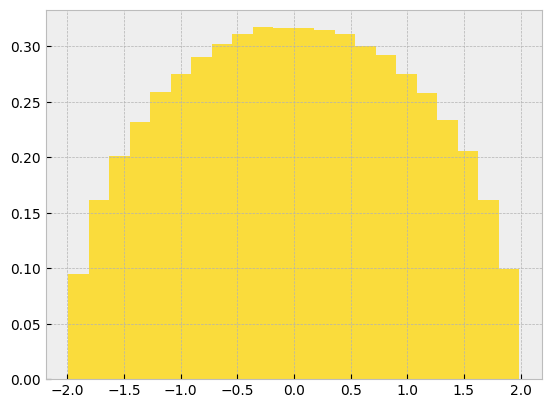

In [6]:
# Plotting the histogramm
plt.hist(eigenvalues, density = True, bins = "auto", alpha = 0.75, color = "gold")

**As you can see, the distribution of its eigenvalues follows Wigner’s semicircle law:**

\begin{equation*}
\lim _ {N \rightarrow + \infty} \hat{\lambda} \left(A _ N \right) = \frac{1}{2 \pi} \sqrt{4 - \lambda ^ 2}
\\
\end{equation*}

**This law is valid when the coefficients of the matrix are independent from each other and identically distributed, with mean zero and variance one.**

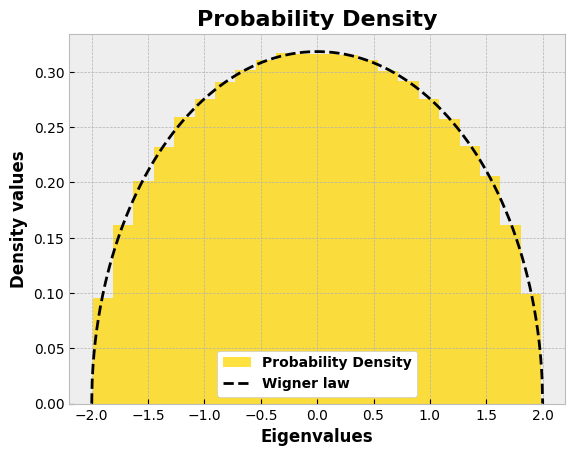

In [7]:
# Plotting the Wigner semi-circle
x = np.linspace(-2, 2, 1000)

Wigner = lambda x: 1 / (2 * np.pi) * np.sqrt(4 - x ** 2)
y = Wigner(x)

plt.hist(eigenvalues, density = True, bins = "auto", alpha = 0.75, color = "gold", label = "Probability Density")
plt.plot(x, y, color = "black", linestyle = "dashed", label = "Wigner law")
plt.title("Probability Density", fontsize = 16, fontweight = "bold")
plt.xlabel("Eigenvalues", fontsize = 12, fontweight = "bold")
plt.ylabel("Density values", fontsize = 12, fontweight = "bold")
plt.legend(prop= {"weight": "bold", "size": 10}, facecolor = "white", framealpha = 1)

**The trace of the matrix, divided by $N$, is related to the Catalan numbers:**

\begin{equation*}
\lim _ {N \rightarrow + \infty} \frac{1}{N} \hat{T} \left( A_N ^ {k} \right) =
\begin{cases}
C _ {k / 2} \quad \text{if k is even} \\
0 \quad \text{if k is odd}
\end{cases}
\end{equation*}

\begin{equation*}
C _ n = \frac{1}{n + 1} \binom{2 n}{n}
\end{equation*}


In [8]:
# Defining the Catalan function
Catalan = lambda n: comb(2 * n, n) / (n + 1)

# Defining the trace function
def Trace(matrix, order):
    res = np.eye(N) 
    
    for _ in range(order):
        res = res @ matrix
        
    trace_N = float(np.linalg.trace(res) / N)
    return trace_N

In [9]:
# Mean of the distribution
Trace(A, 1) 

4.5254833995939045e-05

In [10]:
# Variance of the distribution
print(Trace(A, 2), Catalan(1))

0.9999999999999228 1.0


In [11]:
print(Trace(A, 4), Catalan(2))

2.0002525844479218 2.0


In [12]:
print(Trace(A, 6), Catalan(3))

5.002196083491477 5.0


In [13]:
print(Trace(A, 8), Catalan(4))

14.010762623052907 14.0


In [14]:
print(Trace(A, 10), Catalan(5))

42.044398091139364 42.0


**Now let’s consider the same matrix $A$ without the symmetry property. In this case, the eigenvalues are complex numbers. We’ll compute its eigenvalues and plot them in the complex plane:**

In [15]:
# Defining the random matrix
A = np.random.choice([-1, 1], size = (N, N))
A

array([[-1,  1,  1, ...,  1, -1, -1],
       [-1,  1, -1, ...,  1,  1,  1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [ 1, -1, -1, ..., -1, -1, -1],
       [ 1, -1,  1, ...,  1,  1, -1],
       [ 1,  1,  1, ...,  1, -1, -1]])

In [16]:
A = A / np.sqrt(N)

In [17]:
# Computing its eigenvalues
eigenvalues = np.linalg.eigvals(A)
eigenvalues

array([-1.0043+0.085j , -1.0043-0.085j , -1.0056+0.0174j, ...,
       -0.008 +0.01j  , -0.008 -0.01j  ,  0.0323+0.j    ])

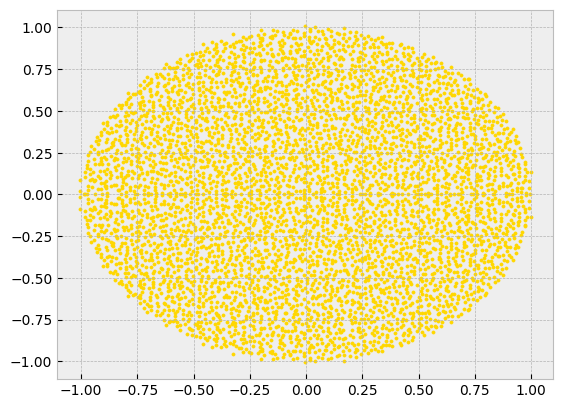

In [18]:
# Plotting in the complex plane
plt.scatter(np.real(eigenvalues), np.imag(eigenvalues), s = 5, color = "gold")

**As you can see, the complex eigenvalues are uniformly distributed within the unit disk on the complex plane, and both the real and imaginary parts of the eigenvalues follow Wigner's semicircle law as well:**

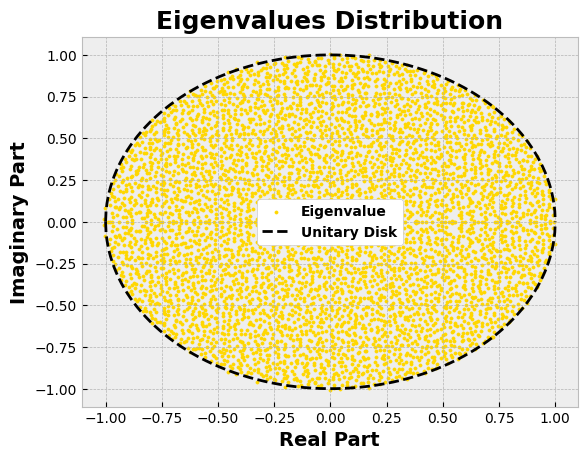

In [19]:
# Plotting the circle
x = np.linspace(-1, 1, 1000)

Circle = lambda x: np.sqrt(1 - x ** 2)
y = [- Circle(x), Circle(x)]


plt.scatter(np.real(eigenvalues), np.imag(eigenvalues), s = 5, label = "Eigenvalue", color = "gold")
plt.plot(x, y[0], color = "black", linestyle = "dashed", label = "Unitary Disk")
plt.plot(x, y[1], color = "black", linestyle = "dashed")
plt.title("Eigenvalues Distribution", fontsize = 18, fontweight = "bold")
plt.xlabel("Real Part", fontsize = 14, fontweight = "bold")
plt.ylabel("Imaginary Part", fontsize = 14, fontweight = "bold")
plt.legend(prop = {"weight": "bold", "size": 10}, facecolor = "white", loc = "center", framealpha = 1)

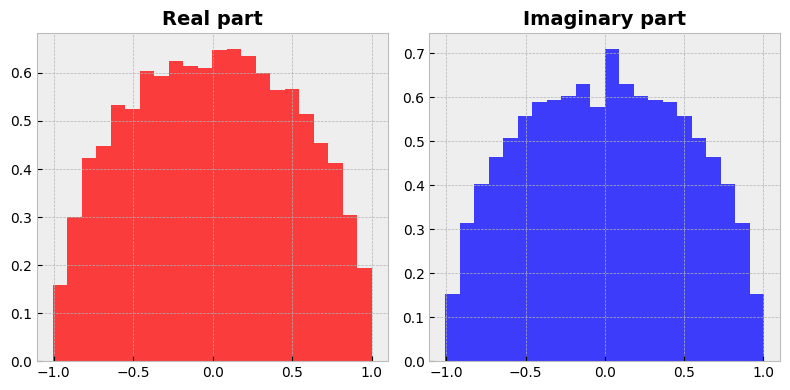

In [20]:
eigenvalues_real = np.real(eigenvalues)
eigenvalues_imag = np.imag(eigenvalues)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].hist(eigenvalues_real, density = True, bins = "auto", alpha = 0.75, color = "red")
ax[0].set_title("Real part", fontsize = 14, fontweight = "bold")

ax[1].hist(eigenvalues_imag, density = True, bins = "auto", alpha = 0.75, color = "blue")
ax[1].set_title("Imaginary part", fontsize = 14, fontweight = "bold")

plt.tight_layout()